In [1]:
import json
import pandas as pd
import hdbscan
import numpy as np
from TFTClusterer import TFTClusterer
from save_matchdata import loaddb
from datetime import datetime, timedelta

In [2]:
db = loaddb(timestamp=(datetime.now() - timedelta(hours=24)).timestamp()*1000)
print(len(db))
assert len(db) > 0

13382


In [3]:
test=TFTClusterer(db)

In [4]:
print(len(test.clusterdf))

106888


In [5]:
test.cluster(divisor=25)

HDB Scan


In [6]:
test.unitshdb.to_csv("unitshdb.csv",index=False)
test.itemshdb.to_csv("itemshdb.csv",index=False)
test.traitshdb.to_csv("traitshdb.csv",index=False) 
test.clusterdf[["comp_id","participants.placement","hdb","game_variation"]].to_csv("hdb.csv",index=False)


In [7]:
str(datetime.fromtimestamp(db['game_datetime'].max()/1e3))

'2020-06-22 07:49:34.179000'

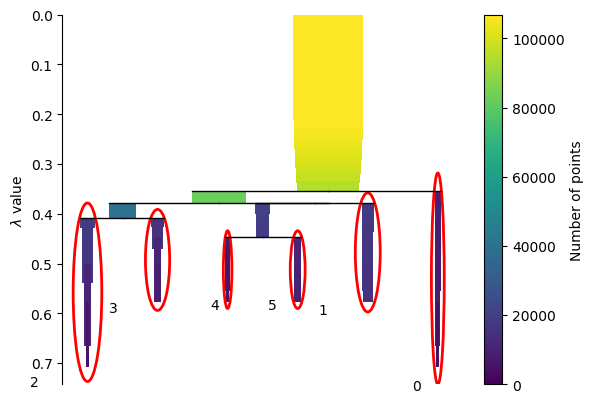

In [8]:
test.plot.figure

In [9]:
test.clusterdf.groupby('hdbnumber')['hdb'].value_counts()

hdbnumber  hdb                   
0          No Comp                   19861
1          Blademaster Rebel          9800
2          Cybernetic Blademaster    18996
3          Rebel Brawler             21848
4          Sorcerer Star Guardian    18485
5          Sniper Astro               6528
6          Vanguard Mystic           11370
Name: hdb, dtype: int64